In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

In [2]:
logging.basicConfig(level=logging.DEBUG, filename='Mushroom.log')

In [3]:
df = pd.read_csv('mushrooms.csv')
logging.debug('imported dataset')

In [4]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [5]:
df['stalk-root'].replace('?', 'b', inplace=True)

In [6]:
df['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [7]:
classes = { 'p': 0, 'e': 1}
y = [classes[item] for item in df['class']]
logging.debug('created target variable')
y

[0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


In [8]:
X = df.drop('class', axis=1)
logging.debug('created dependent features')

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=42)
logging.debug('split data into train & test sets')

## Creating SGD Classifier

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import OneHotEncoder

In [11]:
encoder = OneHotEncoder()
encoder.fit(X)

OneHotEncoder()

In [12]:
sgd = SGDClassifier(random_state=42) 

In [13]:
y_train_pred_sgd = cross_val_predict(sgd, encoder.transform(X_train), y_train, cv=3)
y_train_pred_sgd

array([0, 0, 1, ..., 1, 0, 1])

## Evaluation of SGD Model

In [14]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [15]:
cm = confusion_matrix(y_train, y_train_pred_sgd)
logging.debug('Confusion Matrix of SGD Classifier: {}'.format(cm))
cm

array([[2925,    0],
       [   0, 3168]])

In [16]:
ps = precision_score(y_train, y_train_pred_sgd)
logging.debug('Precision Score of SGD Classifier: {}'.format(ps))
ps

1.0

In [17]:
rs = recall_score(y_train, y_train_pred_sgd)
logging.debug('Recall Score of SGD Classifier: {}'.format(rs))
rs

1.0

In [18]:
from sklearn.metrics import f1_score

In [19]:
f1 = f1_score(y_train, y_train_pred_sgd)
logging.debug('F1 Score of SGD Classifier: {}'.format(f1))
f1

1.0

## Creating Model using Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [21]:
params = {'max_depth':[2, 4, 6, 8, 10]}
dtc = DecisionTreeClassifier(random_state=42)

In [22]:
dtc_gs = GridSearchCV(dtc, params, cv=5, scoring='accuracy')

In [23]:
dtc_gs.fit(encoder.transform(X_train), y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10]}, scoring='accuracy')

In [24]:
dtc_gs.best_params_

{'max_depth': 8}

In [25]:
dtc_gs.best_score_

1.0

In [26]:
dtc = DecisionTreeClassifier(max_depth = 8, random_state = 42)
logging.debug('Created DecsionTree with max_depth=8')

In [27]:
y_train_pred = cross_val_predict(dtc, encoder.transform(X_train), y_train, cv=5)
cm = confusion_matrix(y_train, y_train_pred)
logging.debug('Confusion Matrix of Decision Tree: {}'.format(cm))
cm

array([[2925,    0],
       [   0, 3168]])

In [28]:
dtc.fit(encoder.transform(X_train), y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [29]:
y_pred = dtc.predict(encoder.transform(X_test))
cm = confusion_matrix(y_test, y_pred)
logging.debug('y_test Confusion Matrix of Decision Tree: {}'.format(cm))
cm

array([[ 991,    0],
       [   0, 1040]])

### Evaluation


In [30]:
y_prob = cross_val_predict(dtc, encoder.transform(X_train), y_train, cv = 5, method='predict_proba')
y_prob

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [31]:
y_scores = y_prob[:, 1]
y_scores

array([0., 0., 1., ..., 1., 0., 1.])

In [32]:
from sklearn.metrics import roc_curve
dtc_fpr, dtc_tpr, dtc_threshold = roc_curve(y_train, y_scores)
sgd_fpr, sgd_tpr, sgd_threshold = roc_curve(y_train, y_train_pred_sgd)

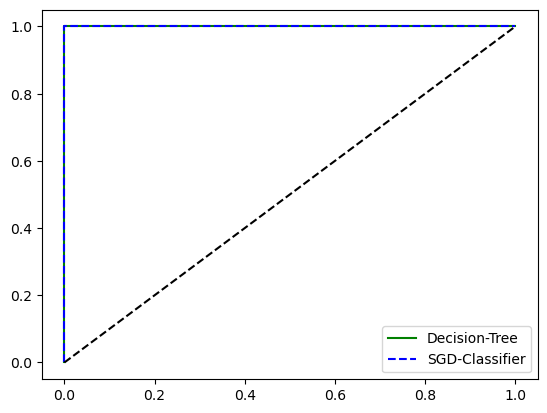

In [33]:
plt.plot(dtc_fpr, dtc_tpr, 'g-', label='Decision-Tree')
plt.plot(sgd_fpr, sgd_tpr, 'b--', label='SGD-Classifier')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')
plt.show()

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_train_pred_sgd)

1.0

## Creating Pipeline

In [35]:
from sklearn.pipeline import Pipeline

In [36]:
pipe = Pipeline([('encoder', OneHotEncoder()), ('decisionTree', DecisionTreeClassifier(max_depth=8, random_state=42))])
logging.debug('Pipeline created using Decision Tree')

In [37]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('encoder', OneHotEncoder()),
                ('decisionTree',
                 DecisionTreeClassifier(max_depth=8, random_state=42))])

In [38]:
y_pred = pipe.predict(X_train)

In [39]:
score = pipe.score(X_test, y_test)
logging.debug('Pipeline Score: {}'.format(score))
score

1.0

In [40]:
y_pred = pipe.predict(X_test)
y_pred 

array([1, 0, 0, ..., 1, 1, 0])

In [41]:
cm = confusion_matrix(y_test, y_pred)
logging.debug('Confusion Matrix of Pipeline: {}'.format(cm))
cm

array([[ 991,    0],
       [   0, 1040]])

In [42]:
import pickle
with open('mushroom_classifier.pkl', 'wb') as f:
    pickle.dump(pipe, f)
    logging.debug('Exported Model')